In [4]:
import pandas as pd
df=pd.read_csv('C:\\workspace\\Give-Me-Some-Credit\\datasets\\cs-training.csv',index_col=0)
df.shape

(150000, 11)

In [12]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

# Section 1: Missing variables

In [5]:
df.isna().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.198207
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.026160
dtype: float64

In [7]:
df[['MonthlyIncome','NumberOfDependents']]

,MonthlyIncome,NumberOfDependents
1,9120.0,2.0
2,2600.0,1.0
3,3042.0,0.0
4,3300.0,0.0
5,63588.0,0.0
...,...,...
149996,2100.0,0.0
149997,5584.0,2.0
149998,NaN,0.0
149999,5716.0,0.0


<Axes: >

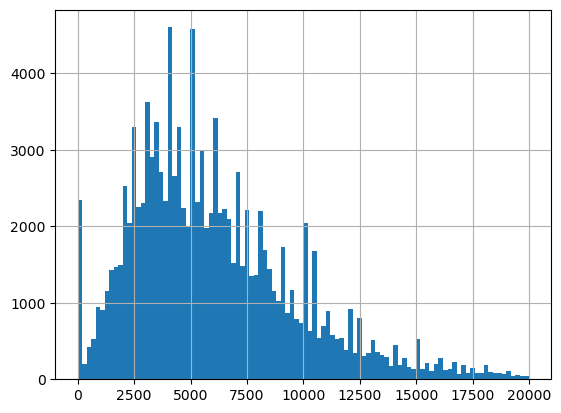

In [11]:
df.loc[df['MonthlyIncome']<20000,'MonthlyIncome'].hist(bins=100)

- Verifying the importance of features with missing variables.

In [18]:
df_not_miss=df.dropna()
df_not_miss

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [19]:
X=df_not_miss.drop('SeriousDlqin2yrs',axis=1)
y=df_not_miss[['SeriousDlqin2yrs']]

In [20]:
from sklearn.ensemble import RandomForestClassifier 
model=RandomForestClassifier().fit(X,y)

c:\Users\shahab\anaconda3\envs\credit_risk\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [26]:
score_df=pd.concat([pd.Series(model.feature_names_in_),pd.Series(model.feature_importances_)],axis=1)
score_df.columns=['name','score']
score_df.sort_values(by='score',ascending=False)
score_df.index=range(len(score_df))

In [27]:
score_df

,name,score
0,RevolvingUtilizationOfUnsecuredLines,0.188369
1,age,0.121651
2,NumberOfTime30-59DaysPastDueNotWorse,0.048843
3,DebtRatio,0.175092
4,MonthlyIncome,0.163279
5,NumberOfOpenCreditLinesAndLoans,0.088680
6,NumberOfTimes90DaysLate,0.088472
7,NumberRealEstateLoansOrLines,0.033989
8,NumberOfTime60-89DaysPastDueNotWorse,0.046915
9,NumberOfDependents,0.044711
